### Configurable Variables
Variables that can be modified in this notebook
- `input_data` — path to the input folder containing the dataset
- `supress_warnings` — boolean flag to enable/disable warning messages (`True`/`False`)
---
**Set following variables if you are running notebook interactively.**

In [127]:
input_path_folder_default = "somde_results/SN048_A121573_Rep1/"
suppress_warnings_default = False

### Load variables from CMD

In [128]:
SUPPRESS_WARNINGS = None
try:
    if suppress_warnings == "True":
        SUPPRESS_WARNINGS = True
    else:
        SUPPRESS_WARNINGS = False
except NameError:
    SUPPRESS_WARNINGS = suppress_warnings_default

## Suppress Warnings (Optional)

* Suppress warnings for cleaner output.
* Comment out the line below if warnings are desired for debugging.

In [129]:
# Suppress warnings for cleaner output
import warnings
import os

if SUPPRESS_WARNINGS:
    print("Ignoring warnings.")
    warnings.filterwarnings('ignore')

### Environment setup

1. Install the necessary packages using `pip` if they are not already installed:

In [130]:
!pip install matplotlib pandas numpy ipywidgets --quiet
%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


2. Import necessary libraries:

In [131]:
# Import of libraries for working with spatial transcriptomics data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as w
from IPython.display import display
import os
import sys

3. load the dataset
  * **Option 1**: Import data directly from Google Drive (requires Google Colab).
  * **Option 2**: Load dataset path from CMD.

In [132]:
# OPTION 1
# from google.colab import drive
# drive.mount('/content/drive')

In [133]:
# OPTION 2
DATA_PATH = None
try:
    DATA_PATH = input_data_folder
except NameError:
    DATA_PATH = input_path_folder_default

if DATA_PATH is None or not os.path.exists(DATA_PATH):
    print("ERROR: Datapath (", DATA_PATH ,") not found.")
    sys.exit()

print("Using input path:", DATA_PATH)

DATA_FOLDER_NAME = DATA_PATH.split("/")[-2].strip()
output_dir = os.path.join("figures/show/somde/" + DATA_FOLDER_NAME)
os.makedirs(output_dir, exist_ok=True)

Using input path: somde_results/SN048_A121573_Rep1/


# SOMDE vizualizations

### Load data

In [134]:
result = pd.read_csv(DATA_PATH + "/somde_result.csv")
result

,Unnamed: 0,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
0,11377,0.924483,4,PLA2G2A,161.381536,0.073056,-64.880681,-3.605869,1.043603,SE,441,0.000018,0.003038,0.000966,154.117542,-574.600391,509.719710,0.0,0.0
1,11867,0.934135,4,PIGR,161.381536,0.063060,-12.199856,-0.773022,0.601891,SE,441,0.000018,0.003887,0.000971,48.755892,-464.299245,452.099389,0.0,0.0
2,14725,0.898257,4,RPS24,161.381536,0.101302,-59.076378,-3.142972,0.774044,SE,441,0.000029,0.002995,0.000960,142.508936,-509.658466,450.582087,0.0,0.0
3,13922,0.881687,4,MUC12,161.381536,0.120014,-34.472510,-6.228427,1.513135,SE,441,0.000044,0.003626,0.000988,93.301199,-470.485737,436.013228,0.0,0.0
4,14855,0.906278,4,MUC2,161.381536,0.092490,-216.096993,-1.856541,1.164002,SE,441,0.000038,0.004596,0.001072,456.550165,-639.305516,423.208523,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36596,25042,0.953092,4,AC084121.13,289.021634,0.035699,15449.368899,-0.686392,0.006817,SE,441,0.000057,0.022875,0.004912,-30874.381618,15763.175533,-313.806634,1.0,1.0
36597,25043,0.953092,4,PRR23D2,289.021634,0.035699,15449.368899,-0.686392,0.006817,SE,441,0.000057,0.022875,0.004896,-30874.381618,15763.175533,-313.806634,1.0,1.0
36598,25044,0.953092,4,DEFB107A,289.021634,0.035699,15449.368899,-0.686392,0.006817,SE,441,0.000057,0.022875,0.004898,-30874.381618,15763.175533,-313.806634,1.0,1.0
36599,25045,0.953092,4,DEFB105A,289.021634,0.035699,15449.368899,-0.686392,0.006817,SE,441,0.000057,0.022875,0.004885,-30874.381618,15763.175533,-313.806634,1.0,1.0


In [135]:
ndf = pd.read_csv("somde_results/" + DATA_FOLDER_NAME + '/ndf.csv', header=None)       # node-level meta-expression
ndf

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,431.000000,432.0,433.0,434.0,435.0,436.0,437.00,438.000000,439.0,440.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
36598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
36599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
36600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.6,0.0,0.0,0.0,0.55,0.000000,0.0,0.0


In [136]:
ninfo = pd.read_csv("somde_results/" + DATA_FOLDER_NAME + '/ninfo.csv') # SOM node coordinates (x, y)
ninfo

,x,y,total_count
0,446.6069,814.3542,25543.583333
1,504.8152,805.4884,25921.250000
2,560.7808,801.1663,22622.142857
3,667.9698,792.4872,7963.750000
4,735.3645,753.4238,13098.562500
...,...,...,...
436,1438.3853,1730.7258,22913.000000
437,1486.3392,1753.2340,46259.500000
438,1530.3209,1736.5197,42613.571429
439,1583.7084,1709.1569,46374.777778


### Volkano plot
Plot shows the relation between significance and effect size. Efect size is the fraction of variance explained by spatial variation.

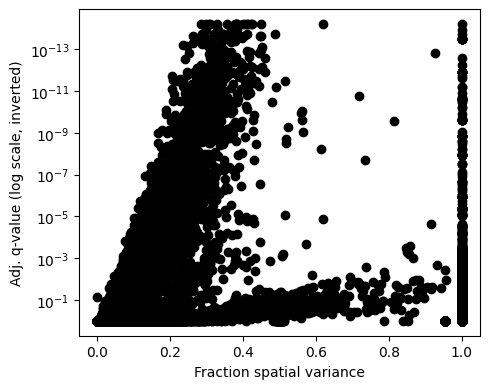

In [137]:
# Filter out non-positive q-values
plot_data = result[result['qval'] > 0]

plt.figure(figsize=(5, 4))
plt.scatter(plot_data['FSV'], plot_data['qval'], c='black')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. q-value (log scale, inverted)')
plt.tight_layout()
plt.show()


### Volkano plot with colored SVGs

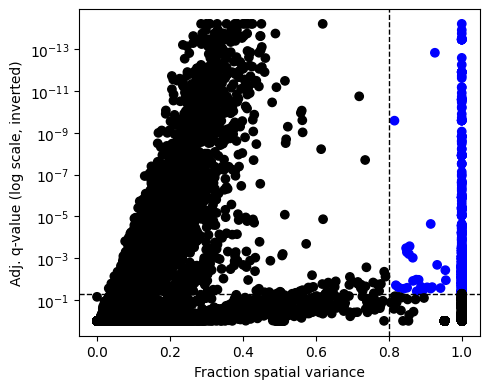

In [138]:
import matplotlib.pyplot as plt

# Filter out non-positive q-values
plot_data = result[result['qval'] > 0]

# Define colors based on the condition
colors = ['blue' if (row['FSV'] >= 0.8 and row['qval'] <= 0.05) else 'black'
          for _, row in plot_data.iterrows()]

plt.figure(figsize=(5, 4))
plt.scatter(plot_data['FSV'], plot_data['qval'], c=colors)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.axhline(0.05, c='black', lw=1, ls='--')
plt.axvline(0.8, c='black', lw=1, ls='--')
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. q-value (log scale, inverted)')
plt.tight_layout()
plt.show()

In [144]:
print("number of spatially variable (blue):", colors.count('blue'))

sv_data = pd.read_csv(DATA_PATH + '/SVnum.csv')
print("Number of spatially variable detected by SOMDE:", sv_data['SVnum'].iloc[0])

number of spatially variable (blue): 856
Number of spatially variable detected by SOMDE: 5877


### Top SVGs bar plot

In [140]:
by_FSV = result.sort_values('FSV', ascending=False).head(10)
by_qval = result.sort_values('qval', ascending=False).head(10)
by_FSV_qval = result.sort_values(['FSV', 'qval'], ascending=[False, True]).head(10)
by_FSV_qval = result.sort_values(['qval', 'FSV'], ascending=[True, False]).head(10)

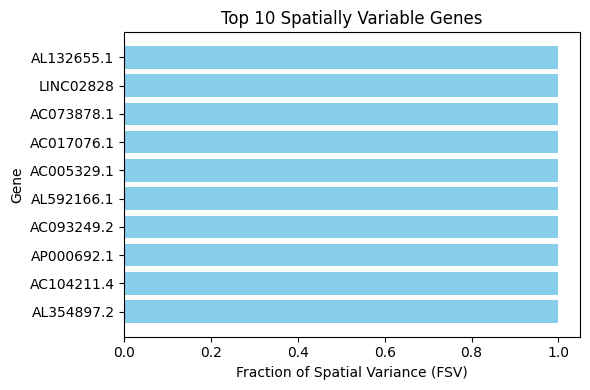

In [141]:
top_genes_data = by_FSV_qval

plt.figure(figsize=(6, 4))
plt.barh(top_genes_data['g'], top_genes_data['FSV'], color='skyblue')
plt.xlabel('Fraction of Spatial Variance (FSV)')
plt.ylabel('Gene')
plt.title('Top 10 Spatially Variable Genes')
plt.gca().invert_yaxis()  # highest FSV on top
plt.tight_layout()
plt.show()

### SOM node Heatmaps for each gene

In [142]:
by_FSV_qval = result.sort_values(['FSV', 'qval'], ascending=[False, True]).head(2)['g'].tolist()
by_FSV = result.sort_values('FSV', ascending=False).head(5)['g'].tolist()
by_qval = result.sort_values('qval', ascending=True).head(5)['g'].tolist()

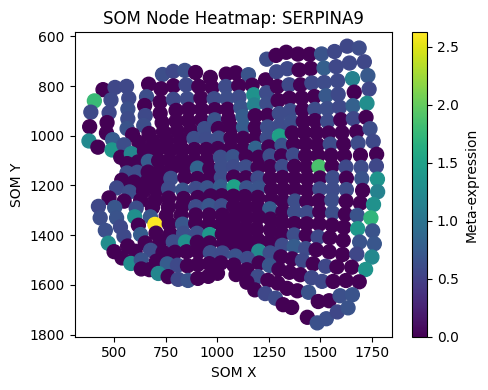

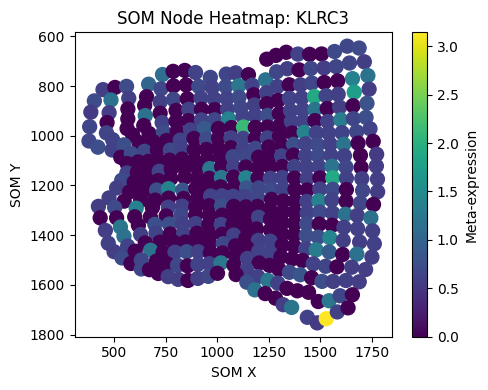

In [143]:
# Choose top genes by FSV and/or qval
top_genes = by_FSV_qval

# Plot SOM node heatmap for each top gene
for gene in top_genes:
    # Find gene index
    gene_idx = result[result['g'] == gene].index[0]

    # Meta-expression for this gene
    meta_expr = ndf.iloc[gene_idx].values  # shape = num_nodes

    # Node coordinates
    x_coords = ninfo["x"].values
    y_coords = ninfo["y"].values

    # Plot heatmap
    plt.figure(figsize=(5, 4))
    sc = plt.scatter(x_coords, y_coords, c=meta_expr, cmap='viridis', s=100)
    plt.colorbar(sc, label='Meta-expression')
    plt.title(f'SOM Node Heatmap: {gene}')
    plt.xlabel('SOM X')
    plt.ylabel('SOM Y')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()